<a href="https://colab.research.google.com/github/Valentina3147/ValentinaLopez/blob/main/Semana2/Entregable_Taller_Forecasting_Ocupacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Cargar dataset de ocupacion de sitios de parqueo
data = pd.read_csv('SJ.csv')
data.head()


,date,idCompany,numTrx
0,2022-08,1,68599
1,2022-09,1,86862
2,2022-10,1,99611
3,2022-11,1,109018
4,2022-12,1,115665


In [3]:
# Revisar cabecera y cola del dataset


print(data.head())
print(data.tail())

      date  idCompany  numTrx
0  2022-08          1   68599
1  2022-09          1   86862
2  2022-10          1   99611
3  2022-11          1  109018
4  2022-12          1  115665
       date  idCompany  numTrx
13  2023-09          1  126851
14  2023-10          1  137539
15  2023-11          1  145327
16  2023-12          1  135537
17  2024-01          1  148111


In [4]:
# Formatear la columna de fecha como año y mes

data['date'] = pd.to_datetime(data['date'], format='%Y-%m')

data.head()




,date,idCompany,numTrx
0,2022-08-01,1,68599
1,2022-09-01,1,86862
2,2022-10-01,1,99611
3,2022-11-01,1,109018
4,2022-12-01,1,115665


In [5]:
# Verificar el nombre de los meses del dataset para comprobar que el formateo es correcto

data['date'].dt.month_name().unique()
data.head()


,date,idCompany,numTrx
0,2022-08-01,1,68599
1,2022-09-01,1,86862
2,2022-10-01,1,99611
3,2022-11-01,1,109018
4,2022-12-01,1,115665


In [6]:
# Contar el numero de datos del dataset

data.count()

,0
date,18
idCompany,18
numTrx,18


In [7]:
# Obtener una estadistica descriptiva básica del dataset, verificar si hay algo anormal


data.describe()

,date,idCompany,numTrx
count,18,18.0,18.000000
mean,2023-04-16 18:40:00,1.0,120111.833333
min,2022-08-01 00:00:00,1.0,68599.000000
25%,2022-12-08 18:00:00,1.0,110679.750000
50%,2023-04-16 00:00:00,1.0,125518.500000
75%,2023-08-24 06:00:00,1.0,135321.000000
max,2024-01-01 00:00:00,1.0,148111.000000
std,NaN,0.0,20840.047288


In [8]:
# Revisar si el ldataset tiene datos nullos

data.isnull().sum()

,0
date,0
idCompany,0
numTrx,0


In [9]:
# Establecer el campo fecha como index del dataframe

data.set_index('date', inplace=True)
data.head()

,idCompany,numTrx
date,,
2022-08-01,1,68599
2022-09-01,1,86862
2022-10-01,1,99611
2022-11-01,1,109018
2022-12-01,1,115665


In [39]:
# Verificar nuevamente el head de la tabla y comprobar que el index ahora sea la fecha

data.head()

,idCompany,numTrx
date,,
2022-08-01,1,68599
2022-09-01,1,86862
2022-10-01,1,99611
2022-11-01,1,109018
2022-12-01,1,115665


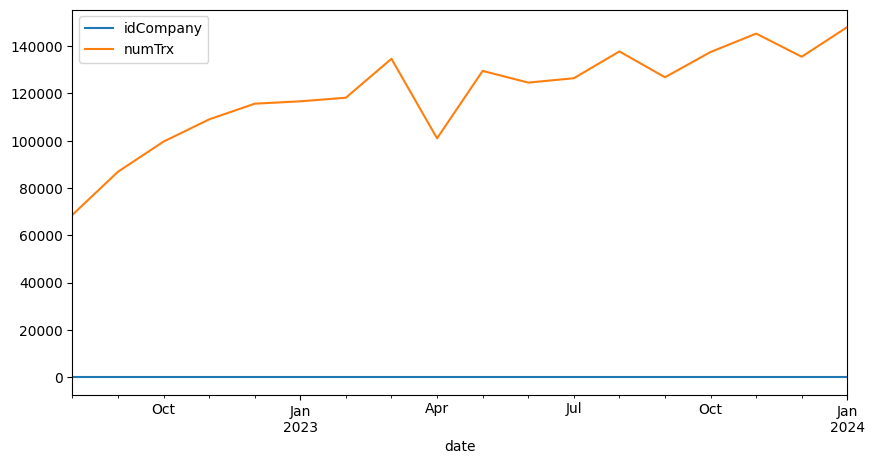

In [10]:
# Realizar una grafica de tendencia del numero de espacios ocupados en el tiempo

data.plot(figsize=(10,5))
plt.show()


In [11]:
data.head()

,idCompany,numTrx
date,,
2022-08-01,1,68599
2022-09-01,1,86862
2022-10-01,1,99611
2022-11-01,1,109018
2022-12-01,1,115665


In [12]:
# Eliminar las columnas que no necesiten para realizar un sistema de prediccion de ocupacion de parqueo

data=data.drop(labels=['idCompany'],axis=1)

In [13]:
# Escalar entre -1 y 1 los datos de la variable a predecir


from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(-1,1))

data_arr = scalar.fit_transform(data)

data_arr

array([[-1.        ],
       [-0.5406228 ],
       [-0.21994164],
       [ 0.01667673],
       [ 0.18387162],
       [ 0.20920113],
       [ 0.24748466],
       [ 0.66198813],
       [-0.18507898],
       [ 0.53282523],
       [ 0.40859241],
       [ 0.45484958],
       [ 0.74019016],
       [ 0.46523795],
       [ 0.73407788],
       [ 0.92997283],
       [ 0.6837207 ],
       [ 1.        ]])

In [14]:
# Definir una ventana temporal adecuada para la prediccion y establecer las listas
# xtrain y ytrain para el entrenamiento

steps = 12
xtrain = []
ytrain = []

for i in range(len(data_arr)-steps):
    xtrain.append(data_arr[i:i+steps])
    ytrain.append(data_arr[i+steps])




In [15]:
# Convertir las listas en arrays de numpy


xtrain = np.array(xtrain)
ytrain = np.array(ytrain)




In [16]:
# Verificar el shape de los datos de entrenamiento (variable independiente y dependiente)


print(xtrain.shape,ytrain.shape)

(6, 12, 1) (6, 1)


In [17]:
# Construir un modelo LSTM para realizar la predicción que tenga la siguiente arquitectura

# Una capa LSTM de 256 neuronas con activación relu
# Una capa LSTM de 256 neuronas con activación relu
# Una capa LSTM de 128 neuronas con activación relu
# Una capa LSTM de 64 neuronas con activación relu
# Una capa LSTM de 32 neuronas con activación relu
# Una capa LSTM de 16 neuronas con activación relu (esta seria la ultima capa LSTM)
# Agregar operaciones de Dropout de 7% despues de cada capa LSTM
# Agregar en la etapa final una red densa con dos capas con 64 neuronas y 32 neuronas
# Finalmente agregar una capa densa de salida
# Imprimir el summary del  modelo


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout


model = Sequential()
model.add(LSTM(units=256,return_sequences=True,activation='relu',input_shape=(20,1)))

#dropout elimina neuronas al azar
model.add(Dropout(0.07))


model.add(LSTM(units=128,return_sequences=True,activation='relu'))
model.add(Dropout(0.07))
model.add(LSTM(units=64,return_sequences=True,activation='relu'))
model.add(Dropout(0.07))
model.add(LSTM(units=32,return_sequences=True,activation='relu'))
model.add(Dropout(0.07))
model.add(LSTM(units=16,return_sequences=False,activation='relu'))
model.add(Dropout(0.07))

model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(1))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 20, 256)             │         264,192 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 20, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 20, 128)             │         197,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 20, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 20, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 20, 32)              │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 20, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 16)                  │           3,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           1,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 529,473 (2.02 MB)

 Trainable params: 529,473 (2.02 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Compilar el modelo con una funcion de error mse y un optimizador adam

model.compile(optimizer='adam',loss='mse')

In [19]:
# Entrenar el modelo durante 100 epocas
# Usar el 10% de los datos de entrenamiento para validacion
# Usar un batch size de 16


history=model.fit(xtrain,ytrain,epochs=100,validation_split=0.1,batch_size=16,verbose=1)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - loss: 0.5271 - val_loss: 0.9586
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.4984 - val_loss: 0.9141
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - loss: 0.4681 - val_loss: 0.8670
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.4356 - val_loss: 0.8167
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step - loss: 0.4026 - val_loss: 0.7626
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - loss: 0.3635 - val_loss: 0.7039
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - loss: 0.3252 - val_loss: 0.6397
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - loss: 0.2840 - val_loss: 0.5687
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - loss: 0.2361 - val_loss: 0.4895
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 0.1952 - val_loss: 0.3996
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - loss: 0.1428 - val_loss: 0.2969
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - loss: 0.0883

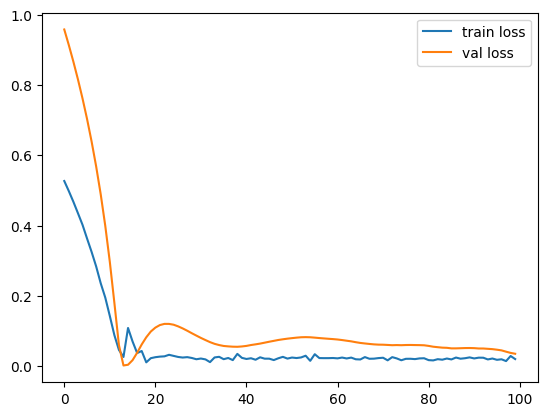

In [20]:
# Grafifcar el loss y loss de validacion para verificar que no haya overfitting
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','val loss'])
plt.show()

In [21]:
# Guardar el modelo y salvarlo en disco

model.save('taller.h5')

In [22]:
# Tome N registros historicos de su dataset y realice la predicción de ocupación para un mes particular
import numpy as np

n = 2


data1 = data_arr[-n:]

data1 = data1.reshape((1, n, 1))

ypred = model.predict(data1)

ypred_original = scalar.inverse_transform(ypred)


print(ypred_original[0][0])



1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 974ms/step
128740.48


In [ ]:
# Proponga una arquitectura que permita recibir como parametros de entrada no solo los historicos de la
# serie temporal sino tambien información adicional relevante como por ejemplo el mes para el cual se
# realiza la predicción, o el número de dias festivos del mes de predicción


